<a href="https://colab.research.google.com/github/DazhiZhong/Pixray_Notebooks/blob/main/pixray_batching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

by [@Dazhi](https://github.com/dazhizhong) (Xieewenz)

In [1]:
# gpu check
nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  print(f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, some things might not work <--")
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

# install
print("Installing...")
from IPython.utils import io
with io.capture_output() as captured:
  !rm -Rf pixray
  !git clone https://github.com/pixray/pixray
  !pip install -r pixray/requirements.txt
  !pip uninstall -y tensorflow 
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !pip freeze | grep torch

# remind restart runtime
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  print("Please choose Runtime -> Restart Runtime from the menu")
  print("(then continue below)")
else:
  print("Setup Complete! Good luck with your drawing")


GPU check: 16280 MiB available: this should be fine
Installing...
Setup Complete! Good luck with your drawing


Using seed: 14900114180446875435
reusing cached copy of model  models/vqgan_imagenet_f16_16384.ckpt
All CLIP models already loaded:  ['ViT-B/32']
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['red roses']
using custom losses: edge


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


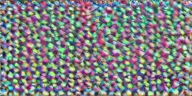

iter: 0, loss: 1.1, losses: 0.948, 0.0469, 0.109 (-0=>1.104)
iter: 10, loss: 0.934, losses: 0.883, 0.0467, 0.00437 (-3=>0.9267)
iter: 20, loss: 0.908, losses: 0.858, 0.0463, 0.00354 (-1=>0.8971)
iter: 30, loss: 0.902, losses: 0.849, 0.0516, 0.00227 (-7=>0.8921)
Dropping learning rate
iter: 40, loss: 0.868, losses: 0.816, 0.0502, 0.00186 (-0=>0.8678)


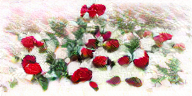

iter: 50, finished (-6=>0.8671)

Using seed: 15199110857553709828
reusing cached copy of model  models/vqgan_imagenet_f16_16384.ckpt
All CLIP models already loaded:  ['ViT-B/32']
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['blue lavender']


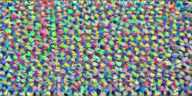

iter: 0, loss: 0.963, losses: 0.916, 0.0464 (-0=>0.9627)
iter: 10, loss: 0.893, losses: 0.848, 0.0453 (-0=>0.8929)
iter: 20, loss: 0.884, losses: 0.839, 0.0447 (-2=>0.8787)
iter: 30, loss: 0.85, losses: 0.805, 0.0444 (-0=>0.8496)
Dropping learning rate
iter: 40, loss: 0.845, losses: 0.799, 0.046 (-2=>0.8349)


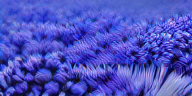

iter: 50, finished (-1=>0.8291)



In [15]:
import sys
sys.path.append("pixray")
# Simple setup
import pixray
import json

consistent_settings = {
    "drawer": "vqgan",
    "quality": "draft",
    "iterations": 50,
    "display_every": 50
}

updating_settings = [
    {
        "prompts": "red roses",
        "custom_loss": "edge"
        
    },
    {
        "prompts": "blue lavender",
        
    }
]

file_names = []
images = []
for i, u_set in enumerate(updating_settings):
    cur_set = consistent_settings.copy()
    cur_set.update(u_set)
    cur_set["output"] = f"output{i:03d}.png"
    pixray.reset_settings()
    pixray.add_settings(**cur_set)
    settings = pixray.apply_settings()
    file_names.append(settings.prompts)
    images.append(settings.output)
    json.dump(settings.__dict__, open(f"settings{i:03d}.json","w"), indent = 2, separators=(',', ': '))
    pixray.do_init(settings)
    pixray.do_run(settings)


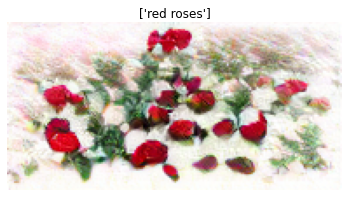

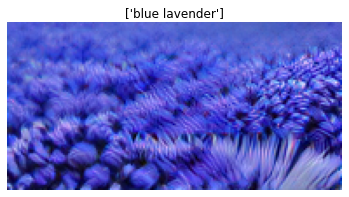

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(title, im):
    image = mpimg.imread(im)
    plt.figure()
    plt.axis('off')
    plt.title(title)
    plt.imshow(image)

for title,image in zip(file_names,images):
    process(title, image)